In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import category_encoders as ce

date_format = "%m/%d/%Y"

<h1>I. Data Understanding</h1>
<p>Bla bla bla</p>

<h1>II. Data Preparation</h1>
<p>We put together all preparations done in the previous file in a function, so we can execute again</p>

In [2]:
def dataProcessing(file):
    df = pd.read_excel(file, index_col="Custid")
    # DROPING COLUMNS
    cols_to_drop = ["Year_Birth", "Dt_Customer", "Kidhome", "Teenhome", "MntLighting", "MntCameras", "MntDoor_Locks", "MntThermostats", "MntSecurity_Systems", "MntPremium", "Z_CostContact", "Z_Revenue", "MntTotal", "Education", "Marital_Status", "Children"]

    # Droping group info
    df.drop(['Group', 'Element1', 'Element2', 'Element3', 'Element4', 'Element5'], axis=1, inplace=True)

    #Creating columns for age and days as a Customer instead of using the regular values
    df['Age'] = 2020 - df['Year_Birth']
    df['DaysAsCustomer'] = (datetime.strptime('03/18/2021', date_format) - df['Dt_Customer']).dt.days

    #Changing the columns teenhome and kidhome to boolean
    df["Kidhome"] = np.where(df["Kidhome"] == 0, df["Kidhome"], 1)
    df["Teenhome"] = np.where(df["Teenhome"] == 0, df["Teenhome"], 1)
    #Creating new column to know if the person has kid, teen, both or none
    df["Children"] = df["Kidhome"] + df["Teenhome"]

    #Dealing with missing values
    #Income
    df['Income'] = df.groupby(['Education', 'Children'])['Income'].apply(lambda x: x.fillna(x.median()))
    #Filling NaN on MntSecurity_Systems and MntPremium by 0
    df['MntSecurity_Systems'].fillna(0, inplace=True)
    df['MntPremium'].fillna(0, inplace=True)
    
    #Preparation DF
    df_prep = df.copy(deep=True)

    #Loggin the Mnt Values
    df_prep["logLighting"] = np.where(df_prep["MntLighting"] == 0, df_prep["MntLighting"], np.log(df_prep["MntLighting"]))
    df_prep["logCameras"] = np.where(df_prep["MntCameras"] == 0, df_prep["MntCameras"], np.log(df_prep["MntCameras"]))
    df_prep["logDoor_Locks"] = np.where(df_prep["MntDoor_Locks"] == 0, df_prep["MntDoor_Locks"], np.log(df_prep["MntDoor_Locks"]))
    df_prep["logThermostats"] = np.where(df_prep["MntThermostats"] == 0, df_prep["MntThermostats"], np.log(df_prep["MntThermostats"]))
    df_prep["logSecurity_Systems"] = np.where(df_prep["MntSecurity_Systems"] == 0, df_prep["MntSecurity_Systems"], np.log(df_prep["MntSecurity_Systems"]))
    df_prep["logPremium"] = np.where(df_prep["MntPremium"] == 0, df_prep["MntPremium"], np.log(df_prep["MntPremium"]))

    #Creating a column with the sum of the Mnt Values
    df_prep["MntTotal"] = df_prep["MntLighting"] + df_prep["MntCameras"] + df_prep["MntDoor_Locks"] + df_prep["MntThermostats"] + df_prep["MntSecurity_Systems"] + df_prep["MntPremium"]
    df_prep["logTotal"] = df_prep["logLighting"] + df_prep["logCameras"] + df_prep["logDoor_Locks"] + df_prep["logThermostats"] + df_prep["logSecurity_Systems"] + df_prep["logPremium"]

    incomeCap = 150000
    df_prep = df_prep[df_prep["Income"] < incomeCap]

    #Summing the Acceptance Campaigns
    df_prep["AcceptCmpTotal"] = df_prep["AcceptedCmp2"] + df_prep["AcceptedCmp3"] + df_prep["AcceptedCmp4"] + df_prep["AcceptedCmp5"]

    #Encoding categorica columns
    # Enconding the columns that are strings or categorical
    colsToEncode = ["Education", "Marital_Status"]
    dummies = pd.get_dummies(df_prep[colsToEncode])
    df_prep = pd.concat([df_prep, dummies], axis=1)

    #Droping original columns
    df_prep.drop(cols_to_drop, axis=1, inplace=True)

    return df_prep

In [3]:
campaign = "Group35_SmartHome_Campaign.xlsx"

df_campaign = dataProcessing(campaign)

/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs

In [4]:
len(df_campaign)

2492

In [5]:
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 350001144 to 350011119
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2492 non-null   float64
 1   Recency                  2492 non-null   int64  
 2   NumDealsPurchases        2492 non-null   int64  
 3   NumWebPurchases          2492 non-null   int64  
 4   NumCatalogPurchases      2492 non-null   int64  
 5   NumStorePurchases        2492 non-null   int64  
 6   NumWebVisitsMonth        2492 non-null   int64  
 7   AcceptedCmp2             2492 non-null   int64  
 8   AcceptedCmp3             2492 non-null   int64  
 9   AcceptedCmp4             2492 non-null   int64  
 10  AcceptedCmp5             2492 non-null   int64  
 11  AcceptedCmp1             2492 non-null   int64  
 12  Complain                 2492 non-null   int64  
 13  DepVar                   2492 non-null   int64  
 14  Age        

<h1>Modeling</h1>

In [16]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
import collections

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

<h4>Useful Functions</h4>

In [8]:
def get_revenue(y_test, y_pred, revenue, cost):
    from sklearn.metrics import confusion_matrix 
    cm = confusion_matrix(y_test, y_pred)
    total_revenue = (cm[1][1]) * revenue
    return total_revenue

In [9]:
def get_profit(y_test, y_pred, revenue, cost):
    from sklearn.metrics import confusion_matrix 
    cm = confusion_matrix(y_test, y_pred)
    total_cost = (cm[0][1] + cm[1][1]) * cost
    total_revenue = (cm[1][1]) * revenue
    profit = total_revenue - total_cost
    return profit

In [10]:
def get_cost(y_test, y_pred, revenue, cost):
    from sklearn.metrics import confusion_matrix 
    cm = confusion_matrix(y_test, y_pred)
    total_cost = (cm[0][1] + cm[1][1]) * cost
    return total_cost

In [11]:
def get_roi(y_test, y_pred, revenue, cost):
    from sklearn.metrics import confusion_matrix 
    cm = confusion_matrix(y_test, y_pred)
    total_cost = (cm[0][1] + cm[1][1]) * cost
    total_revenue = (cm[1][1]) * revenue
    roi = (total_revenue / total_cost) * 100
    return roi

In [12]:
def print_classification(y_test, y_pred_test):
    from sklearn.metrics import classification_report, confusion_matrix
    # Classification Report
    print(classification_report(y_test, y_pred_test))
    
    # Plot
    cm = confusion_matrix(y_test, y_pred_test)

    plt.figure(figsize = (5,3))
    ax = sns.heatmap(cm, annot=True, fmt='g', cmap = 'Blues')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()

<h3>X & y | Train/Test Split</h3>

In [13]:
X = df_campaign.copy(deep=True)

y = X["DepVar"]

X.drop("DepVar", axis=1, inplace=True)

In [14]:
# Split the dataset intro train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 123, stratify=y)

Counter({0: 1630, 1: 239})
0    0.872124
1    0.127876
Name: DepVar, dtype: float64


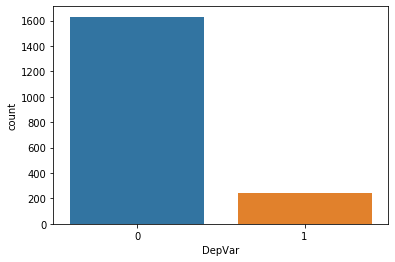

In [17]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
sns.countplot(x="DepVar", data=pd.DataFrame(data={'DepVar':y_train}))
print(y_train.value_counts(normalize=True))

Counter({0: 1630, 1: 1630})


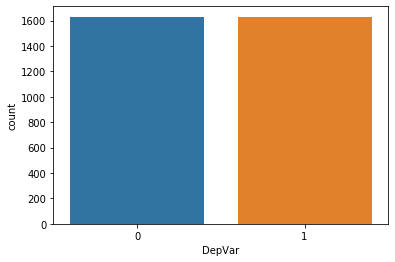

In [18]:
# Import package
from imblearn.over_sampling import SMOTE

# Applyting SMOTE to generare new instances (oversampling)
sm = SMOTE(random_state=123, sampling_strategy=1.0)
X_train2, y_train2 = sm.fit_resample(X_train, y_train)

# Display target balance in the training dataset
print(collections.Counter(y_train2))
sns.countplot(x="DepVar", data=pd.DataFrame(data={'DepVar':y_train2}))

<h2>Tunning the Model</h2>

In [20]:
from sklearn.model_selection import GridSearchCV 
# Execute Grid Search to hyper tune parameters
# This operation can take a long time to run (at least 5 minutes)
# For list of partameters check https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
grid_param = [{'n_estimators': [100,200,300,400,500],
          'max_depth':[5, 6, 8, 9, 12, 15],
          'min_samples_leaf':[2, 3, 4, 5, 7, 10],
          'random_state':[123]}]
classModel = RandomForestClassifier()
grid = GridSearchCV(classModel, grid_param, cv=5)
grid.fit(X_train2, y_train2)
print("Grid search best parameters: {}".format(grid.best_params_))

Grid search best parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 100, 'random_state': 123}


In [21]:
#OLD WAY TO CALCULATE THE BEST PARAMS

"""

#Best number of depth and leaf

# Create an empty dataframe for the resuls
florestPerformance = pd.DataFrame({'Max_Depth': pd.Series([], dtype='string'),
                             'Threshold': pd.Series([], dtype='string'),
                             'Min_Samples_Leaf': pd.Series([], dtype='string'),
                             'Revenue': pd.Series([], dtype='float64'),
                             'Cost': pd.Series([], dtype='float64'),
                             'Profit': pd.Series([], dtype='float64'),
                             'ROI': pd.Series([], dtype='float64')
                             })

D = range(3,15)
for d in D:
    L = range(1,8)

    for l in L:
        T = range(2,5)
        for t in T:
            t = t/10
            
            # Create and train the model
            dt_randFlor = RandomForestClassifier(random_state=123, max_depth=d, min_samples_leaf=l)
            dt_randFlor.fit(X_train, y_train)
            model = dt_randFlor.fit(X_train, y_train)

            # predict y for X_train and X_test
            y_pred_train = (dt_randFlor.predict_proba(X_train)[:,1] >= t).astype(bool)
            y_pred_test = (dt_randFlor.predict_proba(X_test)[:,1] >= t).astype(bool)

            rev = get_revenue(y_test, y_pred_test, 14, 4)
            cost = get_cost(y_test, y_pred_test, 14, 4)
            profity = get_profit(y_test, y_pred_test, 14, 4)
            roi = get_roi(y_test, y_pred_test, 14, 4)

            florestPerformance = florestPerformance.append({'Max_Depth': d,
                                'Threshold': t,
                                'Min_Samples_Leaf': l,
                                'Revenue': rev,
                                'Cost': cost,
                                'Profit': profity,
                                'ROI': roi
                                }, ignore_index=True)
"""

"\n\n#Best number of depth and leaf\n\n# Create an empty dataframe for the resuls\nflorestPerformance = pd.DataFrame({'Max_Depth': pd.Series([], dtype='string'),\n                             'Threshold': pd.Series([], dtype='string'),\n                             'Min_Samples_Leaf': pd.Series([], dtype='string'),\n                             'Revenue': pd.Series([], dtype='float64'),\n                             'Cost': pd.Series([], dtype='float64'),\n                             'Profit': pd.Series([], dtype='float64'),\n                             'ROI': pd.Series([], dtype='float64')\n                             })\n\nD = range(3,15)\nfor d in D:\n    L = range(1,8)\n\n    for l in L:\n        T = range(2,5)\n        for t in T:\n            t = t/10\n            \n            # Create and train the model\n            dt_randFlor = RandomForestClassifier(random_state=123, max_depth=d, min_samples_leaf=l)\n            dt_randFlor.fit(X_train, y_train)\n            model = dt_r

In [22]:
#PLOTING THE BEST PARAMS

"""
sns.pairplot(
    florestPerformance,
    x_vars=["Max_Depth", "Threshold", "Min_Samples_Leaf"],
    y_vars=["Max_Depth", "Threshold", "Min_Samples_Leaf"],
    hue="Profit"
)
"""

'\nsns.pairplot(\n    florestPerformance,\n    x_vars=["Max_Depth", "Threshold", "Min_Samples_Leaf"],\n    y_vars=["Max_Depth", "Threshold", "Min_Samples_Leaf"],\n    hue="Profit"\n)\n'

<h3>Create Model</h3>

According to the modeling trainning, the best fit for the Random Forest would be:
- Min Sample Leaf = 3
- Max Depth = 11
- Threshold = 0.3

In [23]:
# Create and train the model
dt_randFlor = RandomForestClassifier(**grid.best_params_)
dt_randFlor.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, random_state=123)

<h3>Prediction (y_test, y_train)</h3>

In [50]:
model = dt_randFlor.fit(X_train2, y_train2)

# predict y for X_train and X_test

y_pred_train = (dt_randFlor.predict_proba(X_train2)[:,1] >= 0.29).astype(bool)
y_pred_test = (dt_randFlor.predict_proba(X_test)[:,1] >= 0.29).astype(bool)

<h2>Evaluate the Model</h2>

<h3>Confusion Matrix</h3>

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1630
           1       0.91      1.00      0.95      1630

    accuracy                           0.95      3260
   macro avg       0.95      0.95      0.95      3260
weighted avg       0.95      0.95      0.95      3260



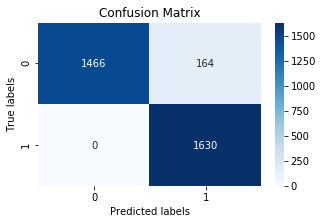

In [51]:
# TRAIN RESULTS
print_classification(y_train2,y_pred_train)

              precision    recall  f1-score   support

           0       0.98      0.77      0.86       543
           1       0.36      0.90      0.52        80

    accuracy                           0.78       623
   macro avg       0.67      0.83      0.69       623
weighted avg       0.90      0.78      0.82       623



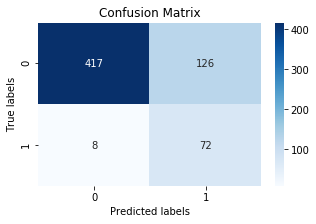

In [52]:
# TEST RESULTS
print_classification(y_test,y_pred_test)

In [53]:
cm = confusion_matrix(y_test,y_pred_test)

TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

print('False Positive Rate (Lower the better): {} %'.format(FP/(TN + FP)*100))
print('False Negative Rate (Lower the better): {} %'.format(FN/(TP + FN)*100))

False Positive Rate (Lower the better): 23.204419889502763 %
False Negative Rate (Lower the better): 10.0 %


<h3>ROI Analysis</h3>

In [54]:
# Analysing the share of users impacted and conversions captured

impactedClients = TP + FP
impactedConversion = TP
allConversion = TP + FN
allClients = len(X_test)

print('Share of selected clients: {} %'.format(impactedClients / allClients * 100))
print('Share of conversions predicted: {} %'.format(impactedConversion / allConversion * 100))

Share of selected clients: 31.781701444622794 %
Share of conversions predicted: 90.0 %


In [55]:
cost = 4
revenue = 14

In [56]:
# By default [Sending everycustomer an promotion]

defaultCampaign = (sum(y_test)*revenue) - (cost * len(X_test))
defaultROI = ((sum(y_test)*revenue) / (cost * len(X_test))) * 100

print('Total Cost: {} €'.format(cost * len(X_test)))
print('Total Revenue: {} €'.format(sum(y_test)*revenue))
print('Total Profit: {} €'.format(defaultCampaign))
print('ROI: {}%'.format(defaultROI))

Total Cost: 2492 €
Total Revenue: 1120 €
Total Profit: -1372 €
ROI: 44.9438202247191%


In [57]:
# By applying the model

decisionTreeProfit = get_profit(y_test = y_test, y_pred = y_pred_test, revenue = revenue, cost = cost)
decisionTreeROI = get_roi(y_test = y_test, y_pred = y_pred_test, revenue = revenue, cost = cost)
decisionTreeCost = get_cost(y_test = y_test, y_pred = y_pred_test, revenue = revenue, cost = cost)
decisionTreeRevenue = get_revenue(y_test = y_test, y_pred = y_pred_test, revenue = revenue, cost = cost)

print('Total Cost: {} €'.format(decisionTreeCost))
print('Total Revenue: {} €'.format(decisionTreeRevenue))
print('Total Profit: {} €'.format(decisionTreeProfit))
print('ROI: {}%'.format(decisionTreeROI))

Total Cost: 792 €
Total Revenue: 1008 €
Total Profit: 216 €
ROI: 127.27272727272727%


<h3>Measures of Performance</h3>

In [58]:
# Function to calculate MAPE metric
def mean_absolute_percentage_error(y_true, y_pred_test): 
    y_true, y_pred_test = np.array(y_true), np.array(y_pred_test)
    return np.mean(np.abs((y_true - y_pred_test) / y_true)) * 100

In [59]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['MAE','RMSE', 'R^2','MAPE (%)','MAX Error']
  train_results = [metricsObj.mean_absolute_error(yTrain, yPredTrain),
                np.sqrt(metricsObj.mean_squared_error(yTrain, yPredTrain)),
                metricsObj.r2_score(yTrain, yPredTrain),
                mean_absolute_percentage_error(yTrain, yPredTrain),
                metricsObj.max_error(yTrain, yPredTrain)]
  test_results = [metricsObj.mean_absolute_error(yTest, yPredTest),
                np.sqrt(metricsObj.mean_squared_error(yTest, yPredTest)),
                metricsObj.r2_score(yTest, yPredTest),
                  mean_absolute_percentage_error(yTest, yPredTest),
                metricsObj.max_error(yTest, yPredTest)]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [60]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


,Measure,Train,Test
0,MAE,0.050307,0.215088
1,RMSE,0.224292,0.463776
2,R^2,0.798773,-0.921777
3,MAPE (%),NaN,NaN
4,MAX Error,1.000000,1.000000


In [61]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain)]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest)]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [62]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.949693,0.784912
1,PRECISION,0.908584,0.363636
2,RECALL,1.000000,0.900000


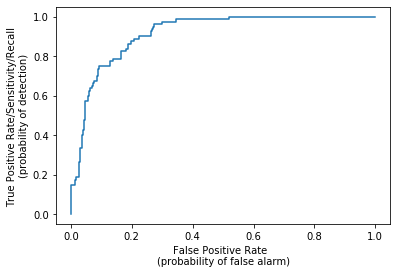

AUC:0.915
Optimal threshold:0.260


In [63]:
# ROC curve
probs = dt_randFlor.predict_proba(X_test)
FP,TP,thresholds = metrics.roc_curve(y_test,probs[:,1])
plt.plot(FP,TP,label="ROC")
plt.xlabel("False Positive Rate  \n(probability of false alarm)")
plt.ylabel("True Positive Rate/Sensitivity/Recall \n(probability of detection)")
cutoff=np.argmax(np.abs(TP-FP)) 
optimal_threshold = thresholds[cutoff]
plt.show()
print("AUC:{0:.3f}".format(metrics.auc(FP, TP)))
print("Optimal threshold:{0:.3f}".format(optimal_threshold))

In [64]:
# Get feature importance
importance = list(dt_randFlor.feature_importances_)
# Create tuples with variable and value
feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(list(X.columns), importance)]
# Sort in descend order
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse = True)
resultsDF = pd.DataFrame(data=feature_importance, columns=['Feature', 'Importance'])
resultsDF

,Feature,Importance
0,DaysAsCustomer,0.27
1,Education_Graduation,0.08
2,Marital_Status_Married,0.08
3,Income,0.05
4,Marital_Status_Together,0.05
5,NumStorePurchases,0.04
6,logThermostats,0.04
7,logPremium,0.04
8,logLighting,0.03
9,logCameras,0.03


# SCORING THE REAL DATA

In [65]:
# Importing the Scoring dataset as it is
original_scoring = pd.read_excel("Group35_SmartHome_Score.xlsx")

/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [66]:
original_scoring

,Custid,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntLighting,...,AcceptedCmp1,Complain,Z_CostContact,Z_Revenue,Group,Element1,Element2,Element3,Element4,Element5
0,350001133,1978,Master,Married,90782.0,0,0,2018-11-03,66,622,...,0,0,4,14,Group35,M2014343,M20200125,M20200319,NaN,NaN
1,350001134,1980,PhD,Single,113023.0,0,0,2019-04-18,6,1014,...,0,0,4,14,Group35,M2014343,M20200125,M20200319,NaN,NaN
2,350001136,1961,PhD,Together,93571.0,0,1,2018-07-22,10,639,...,0,0,4,14,Group35,M2014343,M20200125,M20200319,NaN,NaN
3,350001138,1957,PhD,Divorced,22386.0,1,1,2018-10-31,65,32,...,0,0,4,14,Group35,M2014343,M20200125,M20200319,NaN,NaN
4,350001139,1970,PhD,Married,69485.0,2,1,2017-12-07,73,293,...,0,0,4,14,Group35,M2014343,M20200125,M20200319,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,350011127,1983,Graduation,Married,58121.0,2,1,2018-03-12,6,39,...,0,0,4,14,Group35,M2014343,M20200125,M20200319,NaN,NaN
4996,350011128,1963,PhD,Together,54292.0,0,0,2018-05-09,72,497,...,0,0,4,14,Group35,M2014343,M20200125,M20200319,NaN,NaN
4997,350011130,1961,PhD,Together,99628.0,0,0,2019-05-25,98,810,...,0,0,4,14,Group35,M2014343,M20200125,M20200319,NaN,NaN
4998,350011131,1990,Graduation,Married,111018.0,1,0,2019-05-13,4,778,...,0,0,4,14,Group35,M2014343,M20200125,M20200319,NaN,NaN


In [67]:
scoring = "Group35_SmartHome_Score.xlsx"

df_scoring = dataProcessing(scoring)

/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs

In [68]:
#Predict Values for the Scoring Table

original_scoring["DepVar"] = (dt_randFlor.predict_proba(df_scoring)[:,1] >= 0.29).astype(bool)

In [69]:
original_scoring.groupby("DepVar")["DepVar"].count()

DepVar
False    3613
True     1387
Name: DepVar, dtype: int64

In [70]:
original_scoring["Element4"] = "M20200097"